# Comparison of generated images between the models

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import torch

from principal_RBM_alpha import RBM
from principal_DBN_alpha import DBN
from principal_VAE_MNIST import VAE, train_vae, generate_images, display_images
from download_data import mnist_data
from utils import show_mnist_digits, subsample_data_set, create_dataloader

## Get Data

In [2]:
X_train, X_test, y_train, y_test = mnist_data(path="data/")
X_train, y_train = subsample_data_set(X_train, y_train, nb_data=10000)

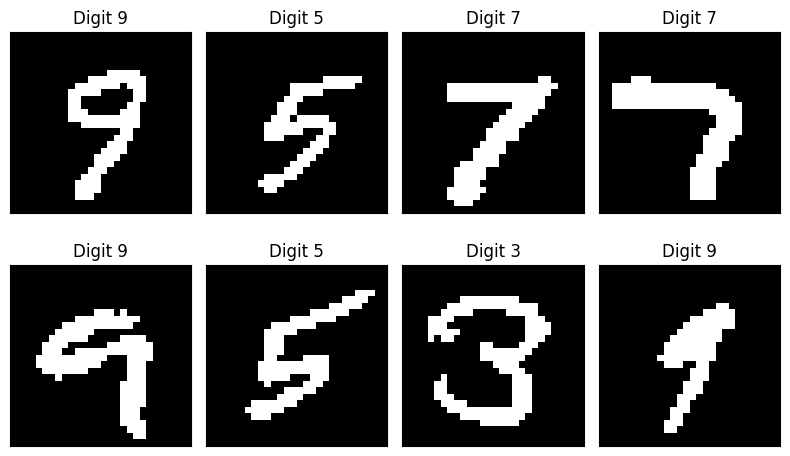

In [3]:
show_mnist_digits(X_train, y_train, 2, 4)

## Train the model and Generate Images

In [4]:
p = 784 #number of visible neurones
q = 316 #number of hidden neurones
EPSILON = 0.1 #learning rate
BATCH_SIZE = 32 #size of the mini-batch
NB_EPOCHS = 100 #number of iterations for gradient descents
NB_GIBBS = 1000 #number of Gibbs sampling steps
NB_DATA = 10 #number of data to generate

### RBM

In [5]:
# Create the model
rbm_model = RBM(p=p, q=q) # size of the model = 784*316 = 247_744

# Train the model
rbm_model, loss = rbm_model.train_RBM(X=X_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS, verbose=True)

plt.plot(loss)
plt.title("Evolution of the loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

  Epoch 0/100 : RMSE = 19.849208085637365


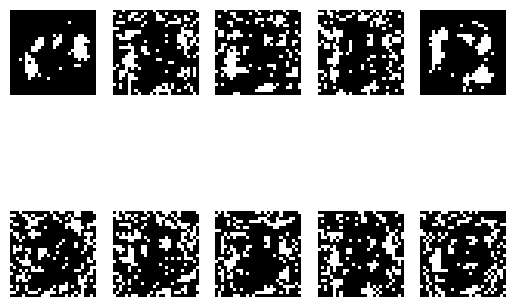

In [ ]:
rbm_model.generer_image_RBM(nb_data=NB_DATA, nb_gibbs=NB_GIBBS, type_data="mnist_digits")

### DBN

In [ ]:
CONFIG = [784, 250, 150, 100]
# Create the model
dbn_model = DBN(config=CONFIG) # size of the model = 784*250 + 250*150 + 150*100 = 248_500

# Train the model
dbn_model, loss = dbn_model.train_DBN(X=X_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS, verbose=True)

plt.plot(loss)
plt.title("Evolution of the loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
dbn_model.generer_image_DBN(nb_data=NB_DATA, nb_gibbs=NB_GIBBS, type_data="mnist_digits")

### VAE

In [ ]:
x_dim = 784
h_dim1 = 140
h_dim2 = 64
z_dim = 10
n_rows = X_train.shape[1]
n_cols = X_train.shape[2]
n_channels = 1

In [ ]:
X_loader = create_dataloader(X_train, batch_size=BATCH_SIZE)

In [ ]:
vae_model = VAE(
    x_dim=x_dim,
    h_dim1=h_dim1,
    h_dim2=h_dim2,
    z_dim=z_dim,
    n_rows=n_rows,
    n_cols=n_cols,
    n_channels=n_channels
    ) # size of the model = 784*140 + 140*64 + 64*10*10 + 10*64 + 64*140 + 140*784 = 244_480

optimizer = torch.optim.Adam(vae_model.parameters(), lr=EPSILON)

for epoch in range(NB_EPOCHS):
    train_vae(vae_model, optimizer, X_loader, epoch, verbose=True)

In [ ]:
imgs = generate_images(vae_model, n_samples=NB_DATA)
display_images(imgs)